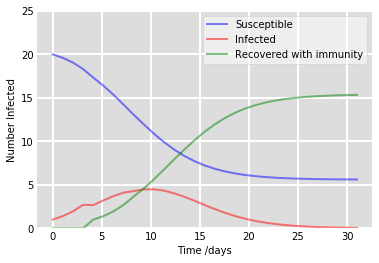

The pandemic stops on day 28


In [ ]:
from numpy import zeros, linspace
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

p = 0.02
n = 20
contact_ratio = 1


Avg_num_contact = n * contact_ratio
beta = p * Avg_num_contact 
#gamma = 1/3
dt = 1             
D = 30          # Simulate for D days

t = np.linspace(0, D+1,D+1)

S = zeros(D+1)
I = zeros(D+1)
R = zeros(D+1)

# Initial condition
S[0] = n
I[0] = 1
R[4] = 1

# Step equations forward in time
for n in range(D):
    #I[n]=0 if I[n] < 0 else I[n]
    S[n+1] = S[n] - dt*beta*S[n]*I[n] / S[0]
    if n < 3:
        I[n+1] = I[n] + dt*beta*S[n]*I[n] / S[0]
    elif n == 3:
        I[n+1] = I[n] + dt*beta*S[n]*I[n] / S[0] - I[0]
    else:
        I[n+1] = I[n] + dt*beta*S[n]*I[n] / S[0] - dt*beta*S[n-4]*I[n-4] / S[0]
        R[n+1] = R[n] + dt*beta*S[n-4]*I[n-4] / S[0]

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number Infected')
ax.set_ylim(0,25)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

n_min = 0.1
for i in range(len(I)):
    if I[i] < n_min:
        print("The pandemic stops on day", i)
        break
        


In [ ]:
S

array([20.        , 19.6       , 19.0512    , 18.30866043, 17.32316398,
       16.3957386 , 15.34501395, 14.20758442, 13.04225674, 11.92560292,
       10.85942166,  9.88520289,  9.03065053,  8.30610225,  7.7048234 ,
        7.21871095,  6.83373826,  6.53347579,  6.30184755,  6.12502075,
        5.99104325,  5.8900708 ,  5.81427678,  5.75757935,  5.71526789,
        5.68374529,  5.66029126,  5.6428592 ,  5.62991221,  5.62030131,
        5.61316982])

In [ ]:
I

array([1.        , 1.4       , 1.9488    , 2.69133957, 2.67683602,
       3.2042614 , 3.70618605, 4.10107601, 4.28090724, 4.47013568,
       4.48559229, 4.32238152, 4.01160622, 3.61950067, 3.15459826,
       2.66649194, 2.19691227, 1.77262646, 1.40297585, 1.0936902 ,
       0.84269501, 0.64340499, 0.48757077, 0.3674414 , 0.27577535,
       0.20632551, 0.15398552, 0.11472015, 0.08535568, 0.06344398,
       0.04712144])

In [ ]:
R

array([ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        1.4       ,  1.9488    ,  2.69133957,  3.67683602,  4.6042614 ,
        5.65498605,  6.79241558,  7.95774326,  9.07439708, 10.14057834,
       11.11479711, 11.96934947, 12.69389775, 13.2951766 , 13.78128905,
       14.16626174, 14.46652421, 14.69815245, 14.87497925, 15.00895675,
       15.1099292 , 15.18572322, 15.24242065, 15.28473211, 15.31625471,
       15.33970874])